In [3]:
import os
print(os.getcwd())

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

c:\Users\asus\Desktop\assignments\Project


In [4]:
#Reading the data from source and printing the first 5 rows of it

In [5]:
data = pd.read_csv(r"C:\Users\asus\Desktop\assignments\Project\smart_deal_recommendations.csv")
data.head()

,trip_purpose,travel_company,current_weather,ambient_temp,time_of_day,offer_type,deal_expiry_window,user_gender,user_age_group,relationship_status,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

data.columns

Index(['trip_purpose', 'travel_company', 'current_weather', 'ambient_temp',
       'time_of_day', 'offer_type', 'deal_expiry_window', 'user_gender',
       'user_age_group', 'relationship_status', 'num_dependents',
       'education_level', 'job_type', 'salary_range', 'vehicle_type',
       'visit_bar_freq', 'visit_cafe_freq', 'visit_takeout_freq',
       'visit_restaurant_low', 'visit_restaurant_high', 'min_gap_to_offer_5',
       'min_gap_to_offer_15', 'min_gap_to_offer_25', 'direction_match',
       'direction_mismatch', 'redeemed', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')

In [7]:
#counting the null values in each row
data.isnull().sum()


trip_purpose                 0
travel_company               0
current_weather              0
ambient_temp                 0
time_of_day                  0
offer_type                   0
deal_expiry_window           0
user_gender                  0
user_age_group               0
relationship_status          0
num_dependents               0
education_level              0
job_type                     0
salary_range                 0
vehicle_type             12576
visit_bar_freq             107
visit_cafe_freq            217
visit_takeout_freq         151
visit_restaurant_low       130
visit_restaurant_high      189
min_gap_to_offer_5           0
min_gap_to_offer_15          0
min_gap_to_offer_25          0
direction_match              0
direction_mismatch           0
redeemed                     0
Unnamed: 26              12684
Unnamed: 27              12684
Unnamed: 28              12684
Unnamed: 29              12684
Unnamed: 30              12684
Unnamed: 31              12684
Unnamed:

In [8]:
len(data)

12684

In [9]:
#removing the un named columns which are empty
cols = [ 'Unnamed: 26', 'Unnamed: 27','Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41']
data = data.drop(columns=cols,axis=1)


In [10]:
list(data.columns)
#listing all the columns in given data


['trip_purpose',
 'travel_company',
 'current_weather',
 'ambient_temp',
 'time_of_day',
 'offer_type',
 'deal_expiry_window',
 'user_gender',
 'user_age_group',
 'relationship_status',
 'num_dependents',
 'education_level',
 'job_type',
 'salary_range',
 'vehicle_type',
 'visit_bar_freq',
 'visit_cafe_freq',
 'visit_takeout_freq',
 'visit_restaurant_low',
 'visit_restaurant_high',
 'min_gap_to_offer_5',
 'min_gap_to_offer_15',
 'min_gap_to_offer_25',
 'direction_match',
 'direction_mismatch',
 'redeemed']

In [11]:
data.isnull().sum()

trip_purpose                 0
travel_company               0
current_weather              0
ambient_temp                 0
time_of_day                  0
offer_type                   0
deal_expiry_window           0
user_gender                  0
user_age_group               0
relationship_status          0
num_dependents               0
education_level              0
job_type                     0
salary_range                 0
vehicle_type             12576
visit_bar_freq             107
visit_cafe_freq            217
visit_takeout_freq         151
visit_restaurant_low       130
visit_restaurant_high      189
min_gap_to_offer_5           0
min_gap_to_offer_15          0
min_gap_to_offer_25          0
direction_match              0
direction_mismatch           0
redeemed                     0
dtype: int64

In [12]:
#removing duplicate rows in the data
data = data.drop_duplicates()
len(data)

12610

In [13]:
#finding info on the data,columns and its types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   trip_purpose           12610 non-null  object
 1   travel_company         12610 non-null  object
 2   current_weather        12610 non-null  object
 3   ambient_temp           12610 non-null  int64 
 4   time_of_day            12610 non-null  object
 5   offer_type             12610 non-null  object
 6   deal_expiry_window     12610 non-null  object
 7   user_gender            12610 non-null  object
 8   user_age_group         12610 non-null  object
 9   relationship_status    12610 non-null  object
 10  num_dependents         12610 non-null  int64 
 11  education_level        12610 non-null  object
 12  job_type               12610 non-null  object
 13  salary_range           12610 non-null  object
 14  vehicle_type           108 non-null    object
 15  visit_bar_freq         1

In [14]:
#counting the unique value count in vehicle type
data['vehicle_type'].value_counts(dropna=False)

vehicle_type
NaN                                         12502
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [15]:
#filling the vehicle type  column's null values with no vehicle even it has large amount of null values are there
data['vehicle_type'] = data['vehicle_type'].fillna("No Vehicle")

In [16]:
#checking whether the values are removed or not

data['vehicle_type'].value_counts(dropna=False)

vehicle_type
No Vehicle                                  12502
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [17]:
#counting the unique value count in visit bar frequency
data['visit_bar_freq'].value_counts(dropna=False)

visit_bar_freq
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
NaN       107
Name: count, dtype: int64

In [18]:
#filling the visit bar freq  column's null values with "never"
data['visit_bar_freq']=data['visit_bar_freq'].fillna("never")

In [19]:
#checking whether the values are removed or not
data['visit_bar_freq'].value_counts(dropna=False)

visit_bar_freq
never    5285
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [20]:
#counting the unique value count in visit cafe freq
data['visit_cafe_freq'].value_counts(dropna=False)

visit_cafe_freq
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
NaN       217
Name: count, dtype: int64

In [21]:
#filling the null values with never and checking whether they're filled or not
data['visit_cafe_freq'] = data['visit_cafe_freq'].fillna("never")
data['visit_cafe_freq'].value_counts(dropna=False)

visit_cafe_freq
less1    3362
1~3      3199
never    3163
4~8      1779
gt8      1107
Name: count, dtype: int64

In [22]:
#counting the unique value count in visit takeout freq
data['visit_takeout_freq'].value_counts(dropna=False)

visit_takeout_freq
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
NaN       150
Name: count, dtype: int64

In [23]:
##filling the visit_takeout fre   column's null values with '1~3 which is the most repeated values
data['visit_takeout_freq'] = data['visit_takeout_freq'].fillna('1~3')


In [24]:
#checking whether the values are removed or not
data['visit_takeout_freq'].value_counts(dropna=False)

visit_takeout_freq
1~3      4795
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64

In [25]:
#counting the unique value count in visit restuarant low
data['visit_restaurant_low'].value_counts(dropna=False)

visit_restaurant_low
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
NaN       129
Name: count, dtype: int64

In [26]:

#filling the visit restuarant low column's null values with '1to3 since it is most repeated values
data['visit_restaurant_low'] = data['visit_restaurant_low'].fillna('1~3')

In [27]:
#checking whether the values are removed or not
data['visit_restaurant_low'].value_counts(dropna=False)

visit_restaurant_low
1~3      5485
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64

In [28]:
#counting the unique value count in in visit restuarant high column
data['visit_restaurant_high'].value_counts(dropna=False)

visit_restaurant_high
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64

In [29]:
#filling the  visit_restaurant_high column's null values with less1
data['visit_restaurant_high'] = data['visit_restaurant_high'].fillna('less1')

In [30]:
#checking whether the values are removed or not
data['visit_restaurant_high'].value_counts(dropna=False)

visit_restaurant_high
less1    6230
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64

In [31]:
#confirming that the data doesn't have the null values
data.isnull().sum()

trip_purpose             0
travel_company           0
current_weather          0
ambient_temp             0
time_of_day              0
offer_type               0
deal_expiry_window       0
user_gender              0
user_age_group           0
relationship_status      0
num_dependents           0
education_level          0
job_type                 0
salary_range             0
vehicle_type             0
visit_bar_freq           0
visit_cafe_freq          0
visit_takeout_freq       0
visit_restaurant_low     0
visit_restaurant_high    0
min_gap_to_offer_5       0
min_gap_to_offer_15      0
min_gap_to_offer_25      0
direction_match          0
direction_mismatch       0
redeemed                 0
dtype: int64

In [32]:
#outlier detections and handling 

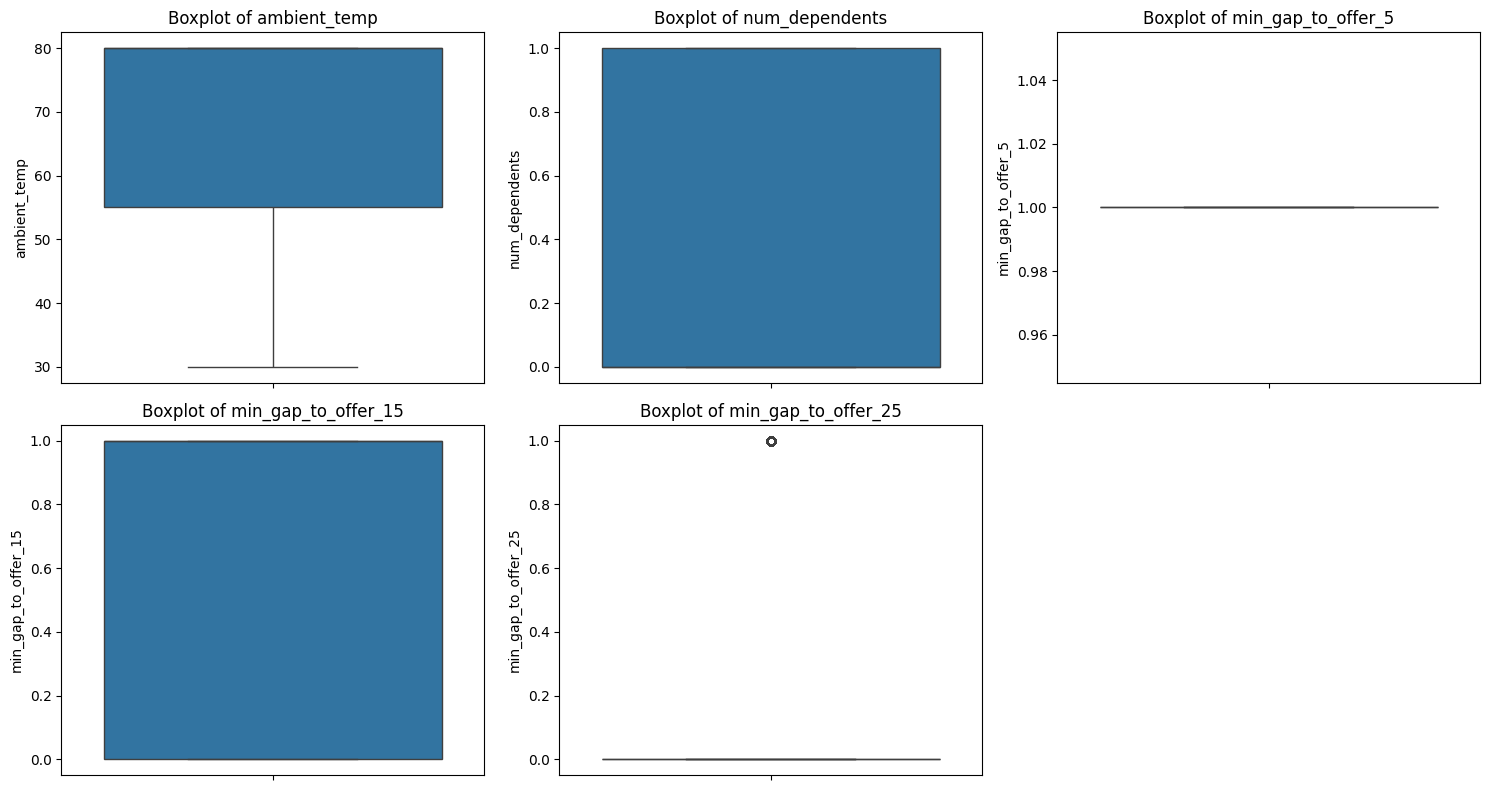

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['ambient_temp', 'num_dependents', 'min_gap_to_offer_5',
                  'min_gap_to_offer_15', 'min_gap_to_offer_25']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [34]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers(data, col)
    print(f"{col}: {len(outliers)} outliers")


ambient_temp: 0 outliers
num_dependents: 0 outliers
min_gap_to_offer_5: 0 outliers
min_gap_to_offer_15: 0 outliers
min_gap_to_offer_25: 1463 outliers


In [35]:
Q1 = data['min_gap_to_offer_25'].quantile(0.25)
Q3 = data['min_gap_to_offer_25'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap values outside bounds
data['min_gap_to_offer_25'] = data['min_gap_to_offer_25'].clip(lower, upper)


In [36]:
#robust scaling is apllied to deal with the outliers

In [37]:


numerical_cols = ['ambient_temp', 'min_gap_to_offer_25']
# Improve feature scaling
from sklearn.preprocessing import RobustScaler  # More robust to outliers

# Replace StandardScaler with RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])



In [38]:
#feature selection using the correlation method

In [39]:
correlation = data.corr(numeric_only=True)['redeemed'].sort_values(ascending=False)
print(correlation)


redeemed               1.000000
ambient_temp           0.059393
direction_match        0.014932
direction_mismatch    -0.014932
num_dependents        -0.045056
min_gap_to_offer_15   -0.082693
min_gap_to_offer_5          NaN
min_gap_to_offer_25         NaN
Name: redeemed, dtype: float64


In [40]:
#dropping the features that are not useful for model

In [41]:
data.drop(['min_gap_to_offer_5', 'min_gap_to_offer_25'], axis=1, inplace=True)

In [42]:
data.drop(['direction_match', 'direction_mismatch'], axis=1, inplace=True)

In [43]:

data.describe()

,ambient_temp,num_dependents,min_gap_to_offer_15,redeemed
count,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,0.559794,0.567565
std,19.153386,0.492657,0.496432,0.495434
min,30.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000


In [44]:
data.info()
#checking that data is clean by checking non null count

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   trip_purpose           12610 non-null  object
 1   travel_company         12610 non-null  object
 2   current_weather        12610 non-null  object
 3   ambient_temp           12610 non-null  int64 
 4   time_of_day            12610 non-null  object
 5   offer_type             12610 non-null  object
 6   deal_expiry_window     12610 non-null  object
 7   user_gender            12610 non-null  object
 8   user_age_group         12610 non-null  object
 9   relationship_status    12610 non-null  object
 10  num_dependents         12610 non-null  int64 
 11  education_level        12610 non-null  object
 12  job_type               12610 non-null  object
 13  salary_range           12610 non-null  object
 14  vehicle_type           12610 non-null  object
 15  visit_bar_freq         1

In [45]:
list(data.columns)
#list of olumns afer removing the unwanted

['trip_purpose',
 'travel_company',
 'current_weather',
 'ambient_temp',
 'time_of_day',
 'offer_type',
 'deal_expiry_window',
 'user_gender',
 'user_age_group',
 'relationship_status',
 'num_dependents',
 'education_level',
 'job_type',
 'salary_range',
 'vehicle_type',
 'visit_bar_freq',
 'visit_cafe_freq',
 'visit_takeout_freq',
 'visit_restaurant_low',
 'visit_restaurant_high',
 'min_gap_to_offer_15',
 'redeemed']

In [46]:
#categorical columns in the data
categotical_cols = ['trip_purpose',
 'travel_company',
 'current_weather',
 'time_of_day',
 'offer_type',
 'deal_expiry_window',
 'user_gender',
 'user_age_group',
 'relationship_status',
 'education_level',
 'job_type',
 'salary_range',
 'vehicle_type',
 'visit_bar_freq',
 'visit_cafe_freq',
 'visit_takeout_freq',
 'visit_restaurant_low',
 'visit_restaurant_high',
 ]

In [47]:
#Exploaratory data analysis

In [48]:
#visualizing the columns of data with respect to the column redeemed

<Axes: ylabel='count'>

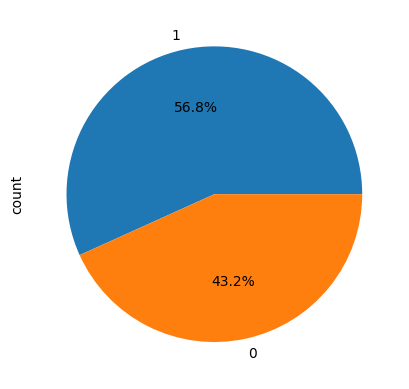

In [49]:
data['redeemed'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [50]:
def visualize(col):
    plt.figure(figsize=(16, 9))
    sns.countplot(x = col,data=data)
plt.show()

<Axes: ylabel='count'>

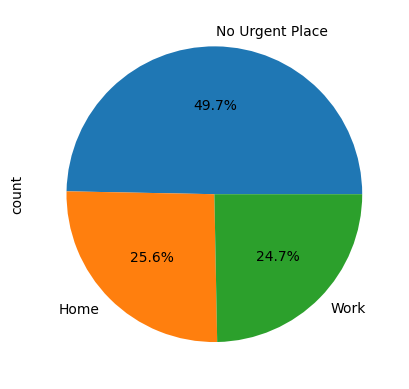

In [51]:
data['trip_purpose'].value_counts().plot(kind='pie',autopct='%1.1f%%')

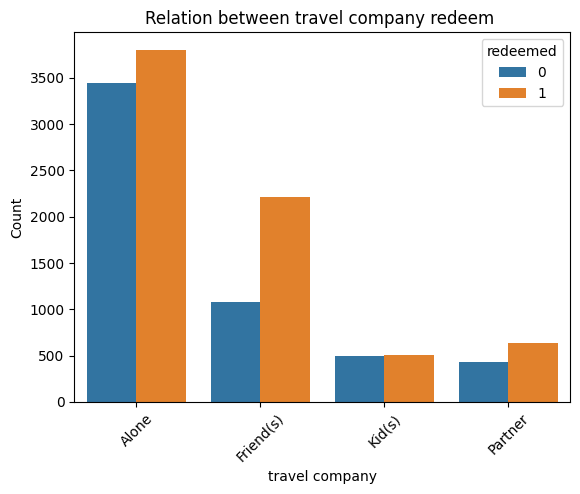

In [52]:

sns.countplot(x='travel_company', hue='redeemed', data=data)
plt.title('Relation between travel company redeem ')
plt.xlabel('travel company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

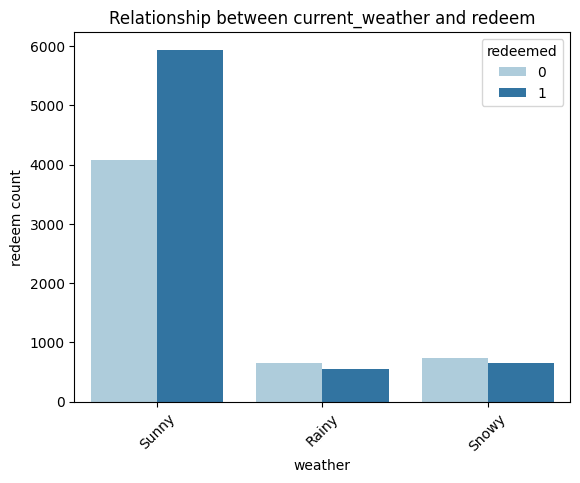

In [53]:

sns.countplot(x='current_weather', hue='redeemed', data=data, palette='Paired')
plt.title('Relationship between current_weather and redeem')
plt.xlabel('weather')
plt.ylabel('redeem count')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

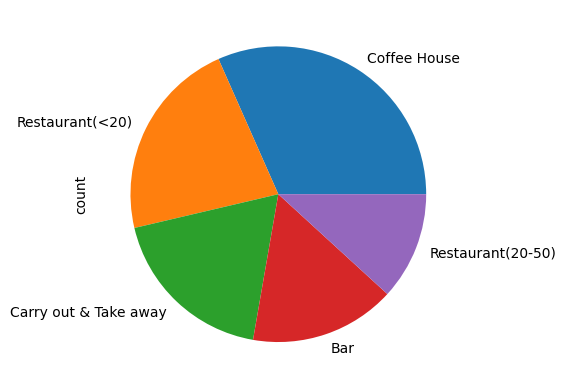

In [54]:
data['offer_type'].value_counts().plot(kind='pie',)

<Axes: xlabel='deal_expiry_window'>

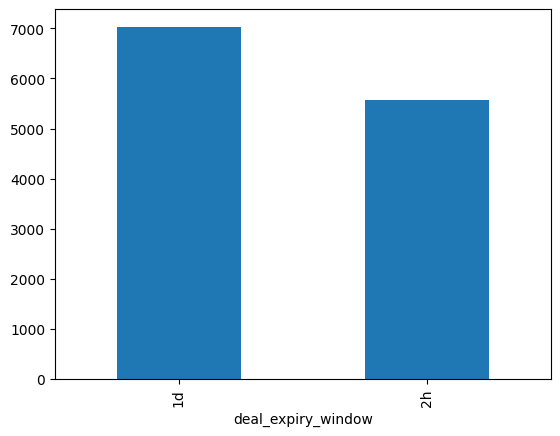

In [55]:
data['deal_expiry_window'].value_counts().plot(kind='bar')

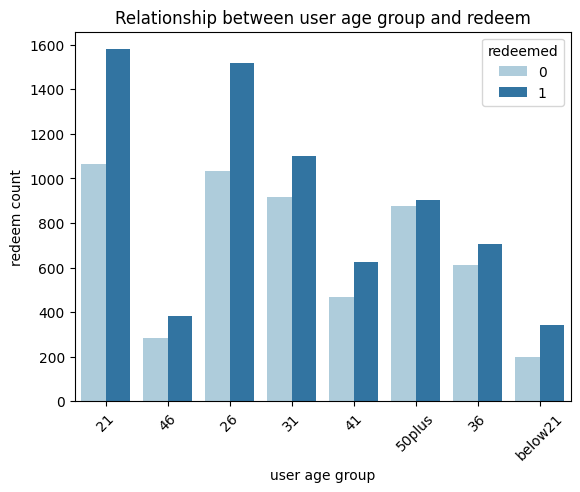

In [56]:

sns.countplot(x='user_age_group', hue='redeemed', data=data, palette='Paired')
plt.title('Relationship between user age group and redeem')
plt.xlabel('user age group')
plt.ylabel('redeem count')
plt.xticks(rotation=45)
plt.show()

In [57]:
data['user_age_group'].value_counts()

user_age_group
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

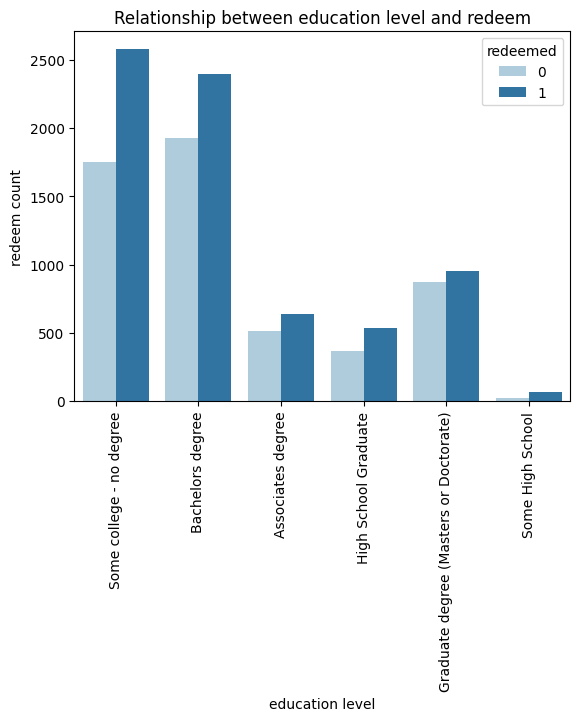

In [58]:

sns.countplot(x='education_level', hue='redeemed', data=data, palette='Paired')
plt.title('Relationship between education level and redeem')
plt.xlabel('education level')
plt.ylabel('redeem count')
plt.xticks(rotation=90)
plt.show()

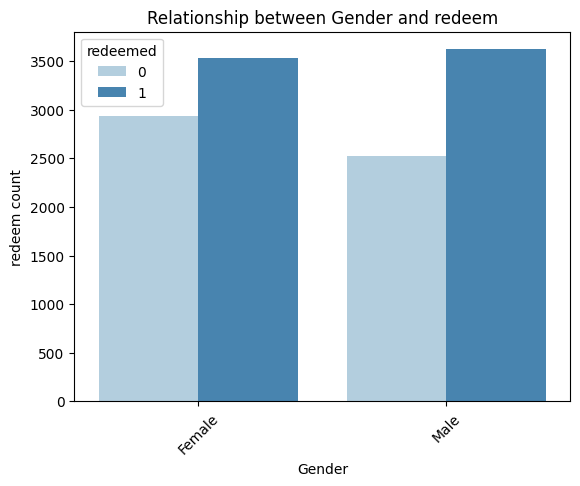

In [59]:

sns.countplot(x='user_gender', hue='redeemed', data=data,palette='Blues')
plt.title('Relationship between Gender and redeem')
plt.xlabel('Gender')
plt.ylabel('redeem count')
plt.xticks(rotation=45)
plt.show()

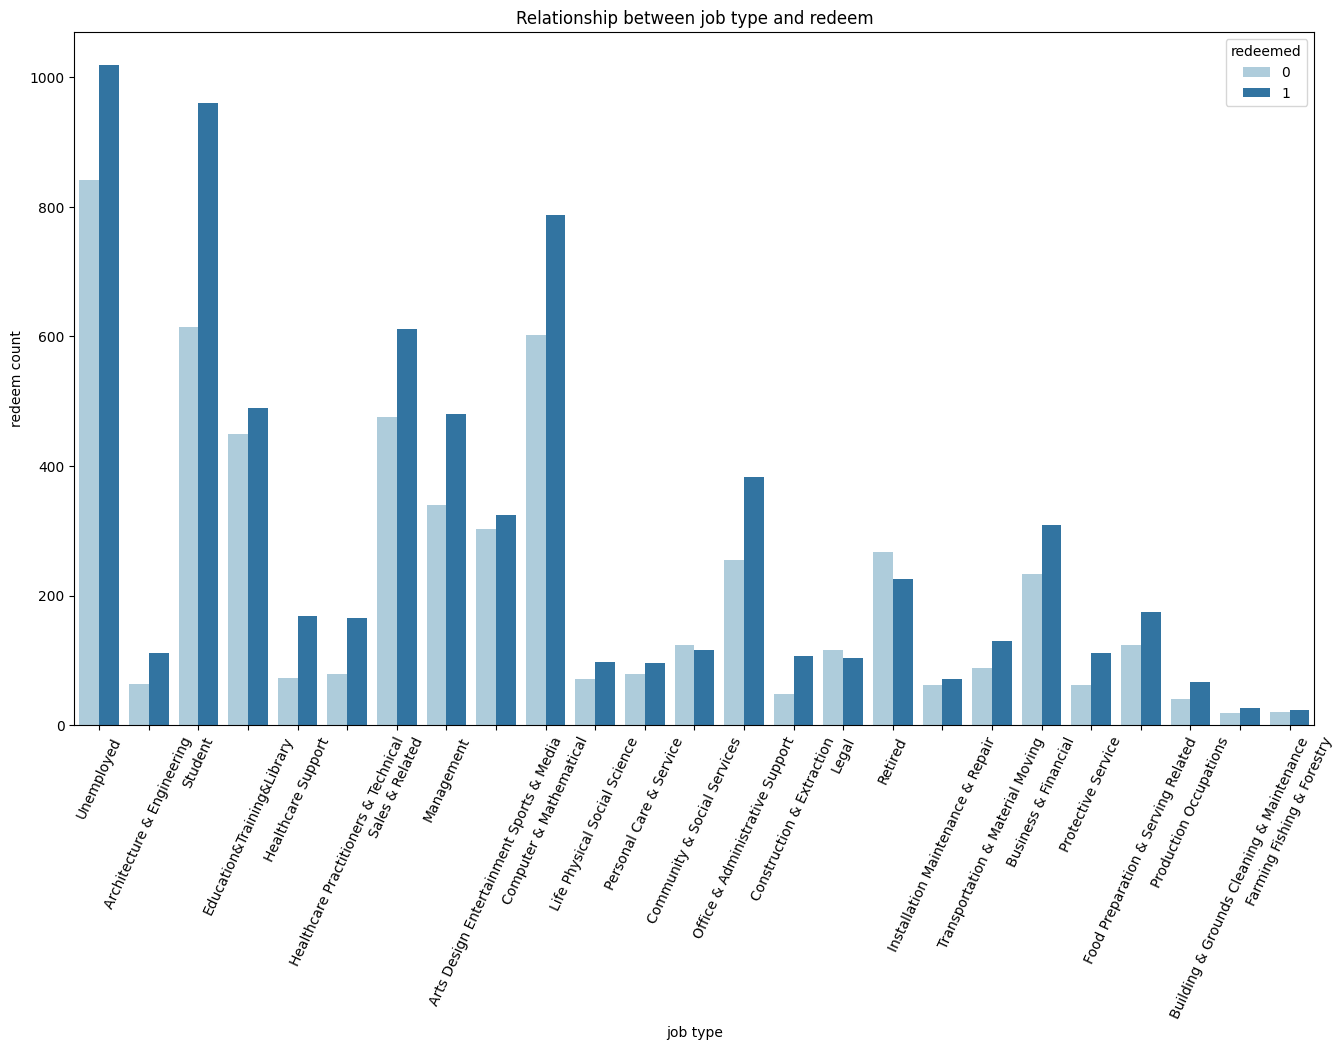

In [60]:
plt.figure(figsize=(16,9))
sns.countplot(x='job_type', hue='redeemed', data=data, palette='Paired')
plt.title('Relationship between job type and redeem')
plt.xlabel('job type')
plt.ylabel('redeem count')
plt.xticks(rotation=65)
plt.show()

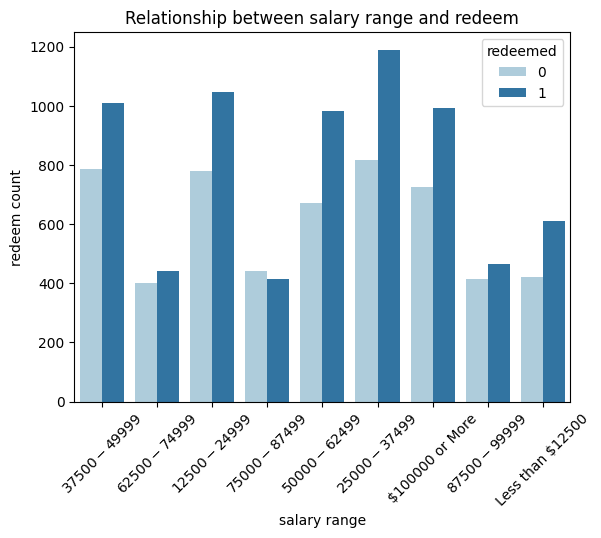

In [61]:

sns.countplot(x='salary_range', hue='redeemed', data=data, palette='Paired')
plt.title('Relationship between salary range and redeem')
plt.xlabel('salary range')
plt.ylabel('redeem count')
plt.xticks(rotation=45)
plt.show()

In [62]:
categotical_cols

['trip_purpose',
 'travel_company',
 'current_weather',
 'time_of_day',
 'offer_type',
 'deal_expiry_window',
 'user_gender',
 'user_age_group',
 'relationship_status',
 'education_level',
 'job_type',
 'salary_range',
 'vehicle_type',
 'visit_bar_freq',
 'visit_cafe_freq',
 'visit_takeout_freq',
 'visit_restaurant_low',
 'visit_restaurant_high']

In [63]:
#Encoding of categorical columns

In [64]:
#one hot encoding of categorical columns
data_encoded = pd.get_dummies(data, columns=categotical_cols, drop_first=True)

In [65]:
#columns after encoding the data
data_encoded.columns

Index(['ambient_temp', 'num_dependents', 'min_gap_to_offer_15', 'redeemed',
       'trip_purpose_No Urgent Place', 'trip_purpose_Work',
       'travel_company_Friend(s)', 'travel_company_Kid(s)',
       'travel_company_Partner', 'current_weather_Snowy',
       'current_weather_Sunny', 'time_of_day_10PM', 'time_of_day_2PM',
       'time_of_day_6PM', 'time_of_day_7AM',
       'offer_type_Carry out & Take away', 'offer_type_Coffee House',
       'offer_type_Restaurant(20-50)', 'offer_type_Restaurant(<20)',
       'deal_expiry_window_2h', 'user_gender_Male', 'user_age_group_26',
       'user_age_group_31', 'user_age_group_36', 'user_age_group_41',
       'user_age_group_46', 'user_age_group_50plus', 'user_age_group_below21',
       'relationship_status_Married partner', 'relationship_status_Single',
       'relationship_status_Unmarried partner', 'relationship_status_Widowed',
       'education_level_Bachelors degree',
       'education_level_Graduate degree (Masters or Doctorate)',
      

In [66]:
data

,trip_purpose,travel_company,current_weather,ambient_temp,time_of_day,offer_type,deal_expiry_window,user_gender,user_age_group,relationship_status,...,job_type,salary_range,vehicle_type,visit_bar_freq,visit_cafe_freq,visit_takeout_freq,visit_restaurant_low,visit_restaurant_high,min_gap_to_offer_15,redeemed
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,No Vehicle,never,never,1~3,4~8,1~3,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,No Vehicle,never,never,1~3,4~8,1~3,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,No Vehicle,never,never,1~3,4~8,1~3,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,No Vehicle,never,never,1~3,4~8,1~3,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,No Vehicle,never,never,1~3,4~8,1~3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,No Vehicle,never,never,1~3,4~8,1~3,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,No Vehicle,never,never,1~3,4~8,1~3,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,No Vehicle,never,never,1~3,4~8,1~3,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,No Vehicle,never,never,1~3,4~8,1~3,1,0


In [67]:
#removing the symbols in the column names which may effect while using xgboost

In [68]:
data_encoded.columns = (
    data_encoded.columns
    .str.replace(r'[\[\]<>()]', '', regex=True)   # raw string: removes brackets, <, >
    .str.replace(' ', '_')                        # replaces spaces
    .str.replace('-', '_')                        # replaces dashes
)


In [69]:
data_encoded.columns

Index(['ambient_temp', 'num_dependents', 'min_gap_to_offer_15', 'redeemed',
       'trip_purpose_No_Urgent_Place', 'trip_purpose_Work',
       'travel_company_Friends', 'travel_company_Kids',
       'travel_company_Partner', 'current_weather_Snowy',
       'current_weather_Sunny', 'time_of_day_10PM', 'time_of_day_2PM',
       'time_of_day_6PM', 'time_of_day_7AM',
       'offer_type_Carry_out_&_Take_away', 'offer_type_Coffee_House',
       'offer_type_Restaurant20_50', 'offer_type_Restaurant20',
       'deal_expiry_window_2h', 'user_gender_Male', 'user_age_group_26',
       'user_age_group_31', 'user_age_group_36', 'user_age_group_41',
       'user_age_group_46', 'user_age_group_50plus', 'user_age_group_below21',
       'relationship_status_Married_partner', 'relationship_status_Single',
       'relationship_status_Unmarried_partner', 'relationship_status_Widowed',
       'education_level_Bachelors_degree',
       'education_level_Graduate_degree_Masters_or_Doctorate',
       'education

In [70]:
#defining the features and target
X = data_encoded.drop('redeemed',axis=1)
Y = data_encoded['redeemed']

In [71]:
#splitting the data of x,y inot train and test data that brings us 4 parts of data

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [73]:
#creating th Random Forest Classifier model 

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, Y)
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)


deal_expiry_window_2h               0.036277
offer_type_Carry_out_&_Take_away    0.034100
ambient_temp                        0.034019
offer_type_Coffee_House             0.031822
offer_type_Restaurant20             0.031199
min_gap_to_offer_15                 0.030455
visit_cafe_freq_never               0.026132
time_of_day_6PM                     0.021298
trip_purpose_No_Urgent_Place        0.019793
visit_restaurant_high_less1         0.018967
dtype: float64

In [75]:
#anohter method for feature selection by settinf the threshold

In [76]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_new = selector.fit_transform(X)


In [77]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(x_train, y_train)
#testing the modelcusing the test data
y_pred = model1.predict(x_test)
#Evaluating the model using it's metrics
accuracy_rf = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [78]:
#displaying the results of model
print("\nRandom forest classifier results : ")
print("\n Accuracy : ",accuracy_rf)
print("\nClassification Report : \n",report)


Random forest classifier results : 

 Accuracy :  0.7474226804123711

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      1106
           1       0.75      0.82      0.78      1416

    accuracy                           0.75      2522
   macro avg       0.75      0.74      0.74      2522
weighted avg       0.75      0.75      0.75      2522



In [79]:
#creating the  model
model2 = MultinomialNB()
#training the data to model
model2.fit(x_train,y_train)

MultinomialNB()

In [80]:
#test the data usuing the test  split of original
y_pred = model2.predict(x_test)
#calculating the perfomnce evaluation of the model
accuracy_nb = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [81]:
#displaying the results of model
print("Multinomial Navie Bayes Results : ")
print("Accuracy : ",accuracy_nb)
print("Classification report \n: ",report)

Multinomial Navie Bayes Results : 
Accuracy :  0.6435368754956384
Classification report 
:                precision    recall  f1-score   support

           0       0.61      0.52      0.56      1106
           1       0.66      0.74      0.70      1416

    accuracy                           0.64      2522
   macro avg       0.64      0.63      0.63      2522
weighted avg       0.64      0.64      0.64      2522



In [82]:
#creating the  model
model3 = SVC(random_state=42)
#training the data to model
model3.fit(x_train,y_train)


SVC(random_state=42)

In [83]:
#test the data usuing the test  split of original
y_pred = model3.predict(x_test)
#calculating the perfomnce evaluation of the model
accuracy_svc = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred,zero_division=0)

In [84]:
#displaying the results of model
print("Support Vector Machine Results:")
print("Accuracy: ",accuracy_svc)
print("Classification Report:\n", report)

Support Vector Machine Results:
Accuracy:  0.5614591593973037
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1106
           1       0.56      1.00      0.72      1416

    accuracy                           0.56      2522
   macro avg       0.28      0.50      0.36      2522
weighted avg       0.32      0.56      0.40      2522



In [85]:
#creating the  model
model4 = LogisticRegression(solver='saga',random_state=42,max_iter=10)
#training the data to model
model4.fit(x_train,y_train)

c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10, random_state=42, solver='saga')

In [86]:
#test the data usuing the test  split of original
y_pred = model4.predict(x_test)
#calculating the perfomnce evaluation of the model
accuracy_lr = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [87]:

#displaying the results of model
print("Logistic Regression Results:")
print(f"Accuracy: ",accuracy_lr)
print("Classification Report:\n", report)


Logistic Regression Results:
Accuracy:  0.6566217287866772
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.51      0.56      1106
           1       0.67      0.77      0.72      1416

    accuracy                           0.66      2522
   macro avg       0.65      0.64      0.64      2522
weighted avg       0.65      0.66      0.65      2522



In [88]:
#creating the  model
model5 = GradientBoostingClassifier(random_state=42)
#training the data to model
model5.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [89]:
#test the data usuing the test  split of original
y_pred = model5.predict(x_test)
#calculating the perfomnce evaluation of the model
accuracy_gb = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [90]:
#displaying the results of model
print("Gradient Boosting Classification Results : ")
print("Accuracy : ",accuracy_gb)
print("Classification report : \n",report)

Gradient Boosting Classification Results : 
Accuracy :  0.6982553528945281
Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.58      0.63      1106
           1       0.71      0.79      0.75      1416

    accuracy                           0.70      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.70      0.70      0.69      2522



In [91]:


xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [92]:


y_pred = xgb_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.7474226804123711
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.75      2522
   macro avg       0.74      0.74      0.74      2522
weighted avg       0.75      0.75      0.75      2522



In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [94]:

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Multinomial NB": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    # Used scaled data for SVC and Logistic, raw for others (NB works better without scaling)
    if name in ["SVC", "Logistic Regression"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = x_train, x_test
    
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    
    # Store metrics
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'report': classification_report(y_test, y_pred)
    }

In [95]:
# Creating a comparison table
report_df = pd.DataFrame.from_dict(results, orient='index')
report_df = report_df[['accuracy', 'precision', 'recall', 'f1']]
print(report_df.sort_values(by='accuracy', ascending=False))

                     accuracy  precision    recall        f1
Random Forest        0.747423   0.746635  0.747423  0.745380
XGBoost              0.747423   0.746427  0.747423  0.746323
Logistic Regression  0.667328   0.664667  0.667328  0.663288
SVC                  0.667328   0.664878  0.667328  0.664696
Multinomial NB       0.643537   0.640050  0.643537  0.639058


In [96]:
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print(metrics['report'])


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1106
           1       0.75      0.82      0.78      1416

    accuracy                           0.75      2522
   macro avg       0.75      0.74      0.74      2522
weighted avg       0.75      0.75      0.75      2522


=== Multinomial NB ===
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1106
           1       0.66      0.74      0.70      1416

    accuracy                           0.64      2522
   macro avg       0.64      0.63      0.63      2522
weighted avg       0.64      0.64      0.64      2522


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1106
           1       0.68      0.76      0.72      1416

    accuracy                           0.67      2522
   macro avg       0.66      0.65      0.66      252

In [98]:
data_encoded.to_csv('final_dataset.csv', index=False)
